In [130]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive/My\ Drive/MSBA/BA890/data

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive/My Drive/MSBA/BA890/data


In [131]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [132]:
! ls

ingr_map.pkl		interactions_validation.csv  RAW_interactions.csv
interactions_test.csv	PP_recipes.csv		     RAW_recipes.csv
interactions_train.csv	PP_users.csv


In [133]:
df_recipes = pd.read_csv('RAW_recipes.csv')
df_interact = pd.read_csv('RAW_interactions.csv')

In [134]:
df_recipes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231637 entries, 0 to 231636
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   name            231636 non-null  object
 1   id              231637 non-null  int64 
 2   minutes         231637 non-null  int64 
 3   contributor_id  231637 non-null  int64 
 4   submitted       231637 non-null  object
 5   tags            231637 non-null  object
 6   nutrition       231637 non-null  object
 7   n_steps         231637 non-null  int64 
 8   steps           231637 non-null  object
 9   description     226658 non-null  object
 10  ingredients     231637 non-null  object
 11  n_ingredients   231637 non-null  int64 
dtypes: int64(5), object(7)
memory usage: 21.2+ MB


In [135]:
df_interact.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1132367 entries, 0 to 1132366
Data columns (total 5 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   user_id    1132367 non-null  int64 
 1   recipe_id  1132367 non-null  int64 
 2   date       1132367 non-null  object
 3   rating     1132367 non-null  int64 
 4   review     1132198 non-null  object
dtypes: int64(3), object(2)
memory usage: 43.2+ MB


In [136]:
df_recipes.head()

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6
2,all in the kitchen chili,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",13
3,alouette potatoes,59389,45,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course...","[368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]",11,['place potatoes in a large pot of lightly sal...,"this is a super easy, great tasting, make ahea...","['spreadable cheese with garlic and herbs', 'n...",11
4,amish tomato ketchup for canning,44061,190,41706,2002-10-25,"['weeknight', 'time-to-make', 'course', 'main-...","[352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]",5,['mix all ingredients& boil for 2 1 / 2 hours ...,my dh's amish mother raised him on this recipe...,"['tomato juice', 'apple cider vinegar', 'sugar...",8


In [137]:
# join recipes on interactions to see which recipes are most popular
df = pd.merge(df_interact, df_recipes[['name','id']], left_on='recipe_id', right_on='id')
del df['id']

In [138]:
df.head()

,user_id,recipe_id,date,rating,review,name
0,38094,40893,2003-02-17,4,Great with a salad. Cooked on top of stove for...,white bean green chile pepper soup
1,1293707,40893,2011-12-21,5,"So simple, so delicious! Great for chilly fall...",white bean green chile pepper soup
2,8937,44394,2002-12-01,4,This worked very well and is EASY. I used not...,devilicious cookie cake delights
3,126440,85009,2010-02-27,5,I made the Mexican topping and took it to bunk...,baked potato toppings
4,57222,85009,2011-10-01,5,"Made the cheddar bacon topping, adding a sprin...",baked potato toppings


In [139]:
df.info()

# one missing name
# a couple of missing reviews

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1132367 entries, 0 to 1132366
Data columns (total 6 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   user_id    1132367 non-null  int64 
 1   recipe_id  1132367 non-null  int64 
 2   date       1132367 non-null  object
 3   rating     1132367 non-null  int64 
 4   review     1132198 non-null  object
 5   name       1132366 non-null  object
dtypes: int64(3), object(3)
memory usage: 60.5+ MB


# EDA

In [140]:
df.loc[df[['recipe_id','user_id']].duplicated() == True]
# no duplicates

,user_id,recipe_id,date,rating,review,name


In [141]:
print(df.name.unique().shape[0]) 
print(df.recipe_id.unique().shape[0])
# there are some recipes with the same names, as expected

230186
231637


In [142]:
# adding number of times the recipes has been cooked
tmp = df.groupby(['recipe_id']).count().sort_values('user_id', ascending=False).iloc[:,0:1]
tmp.columns = ['review_freq']
tmp = tmp.reset_index()
# tmp
df_recipes2 = pd.merge(df_recipes, tmp, how='left', left_on = 'id', right_on = 'recipe_id')
del df_recipes2['recipe_id']

In [143]:
df_recipes2

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients,review_freq
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7,3
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6,4
2,all in the kitchen chili,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",13,1
3,alouette potatoes,59389,45,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course...","[368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]",11,['place potatoes in a large pot of lightly sal...,"this is a super easy, great tasting, make ahea...","['spreadable cheese with garlic and herbs', 'n...",11,2
4,amish tomato ketchup for canning,44061,190,41706,2002-10-25,"['weeknight', 'time-to-make', 'course', 'main-...","[352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]",5,['mix all ingredients& boil for 2 1 / 2 hours ...,my dh's amish mother raised him on this recipe...,"['tomato juice', 'apple cider vinegar', 'sugar...",8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
231632,zydeco soup,486161,60,227978,2012-08-29,"['ham', '60-minutes-or-less', 'time-to-make', ...","[415.2, 26.0, 34.0, 26.0, 44.0, 21.0, 15.0]",7,"['heat oil in a 4-quart dutch oven', 'add cele...",this is a delicious soup that i originally fou...,"['celery', 'onion', 'green sweet pepper', 'gar...",22,6
231633,zydeco spice mix,493372,5,1500678,2013-01-09,"['15-minutes-or-less', 'time-to-make', 'course...","[14.8, 0.0, 2.0, 58.0, 1.0, 0.0, 1.0]",1,['mix all ingredients together thoroughly'],this spice mix will make your taste buds dance!,"['paprika', 'salt', 'garlic powder', 'onion po...",13,1
231634,zydeco ya ya deviled eggs,308080,40,37779,2008-06-07,"['60-minutes-or-less', 'time-to-make', 'course...","[59.2, 6.0, 2.0, 3.0, 6.0, 5.0, 0.0]",7,"['in a bowl , combine the mashed yolks and may...","deviled eggs, cajun-style","['hard-cooked eggs', 'mayonnaise', 'dijon must...",8,5
231635,cookies by design cookies on a stick,298512,29,506822,2008-04-15,"['30-minutes-or-less', 'time-to-make', 'course...","[188.0, 11.0, 57.0, 11.0, 7.0, 21.0, 9.0]",9,['place melted butter in a large mixing bowl a...,"i've heard of the 'cookies by design' company,...","['butter', 'eagle brand condensed milk', 'ligh...",10,1


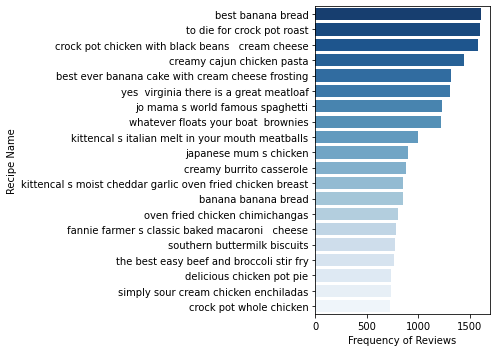

In [144]:
tmp = df_recipes2.sort_values('review_freq', ascending=False).head(20)

plt.figure(figsize=(7,5))
sns.barplot(x="review_freq", y="name", data=tmp, palette="Blues_r")
plt.xlabel('Frequency of Reviews')
plt.ylabel('Recipe Name')
plt.tight_layout()

In [145]:
# adding number of times the recipes has been cooked
tmp = df.groupby(['recipe_id']).mean().sort_values('rating', ascending=False).rating
tmp
# tmp.columns = ['count']
# tmp = tmp.reset_index()
# tmp
df_recipes2 = pd.merge(df_recipes2, tmp, how='left', left_on = 'id', right_on = 'recipe_id')
# del df_recipes2['recipe_id']

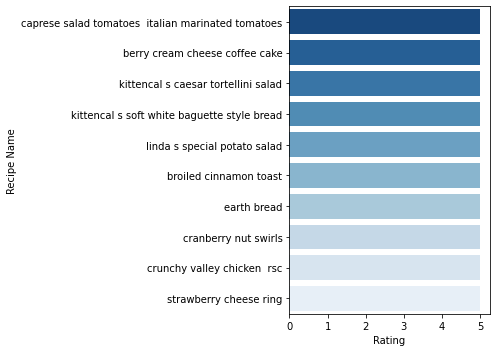

In [146]:
# filtering for recipes with review_freq above mean
# tmp = df_recipes2.loc[df_recipes2['review_freq'] > df_recipes2['review_freq'].mean()]
tmp = df_recipes2.sort_values(['rating','review_freq'], ascending=False).head(10)

plt.figure(figsize=(7,5))
sns.barplot(x="rating", y="name", data=tmp, palette="Blues_r")
plt.xlabel('Rating')
plt.ylabel('Recipe Name')
plt.xticks(range(0,6))
plt.tight_layout()

In [147]:
tmp
# it seems that recipes with max rating have very few reviews

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients,review_freq,rating
35255,caprese salad tomatoes italian marinated toma...,55309,10,63098,2003-03-01,"['15-minutes-or-less', 'time-to-make', 'course...","[137.5, 21.0, 9.0, 24.0, 1.0, 9.0, 1.0]",13,['mix all ingredients together and set on coun...,another secret from my italian brother-in-law....,"['roma tomatoes', 'garlic clove', 'extra virgi...",6,52,5.0
21941,berry cream cheese coffee cake,24768,85,2586,2002-04-08,"['weeknight', 'time-to-make', 'course', 'prepa...","[415.8, 36.0, 98.0, 14.0, 11.0, 40.0, 15.0]",19,"['heat oven to 350 degrees', 'grease and flour...",this beautiful cake looks just like a gourmet ...,"['flour', 'sugar', 'margarine', 'baking powder...",12,37,5.0
118005,kittencal s caesar tortellini salad,166669,5,89831,2006-05-01,"['15-minutes-or-less', 'time-to-make', 'course...","[287.7, 31.0, 10.0, 25.0, 14.0, 21.0, 6.0]",6,['in a medium bowl combine the cooked tortelli...,"my family *loves* this salad, i make often in ...","['cheese tortellini', 'romaine lettuce', 'caes...",8,36,5.0
118290,kittencal s soft white baguette style bread,121941,145,89831,2005-05-13,"['time-to-make', 'course', 'preparation', 'hea...","[1689.8, 42.0, 72.0, 108.0, 94.0, 76.0, 102.0]",24,['prepare one large cookie sheet lined with fo...,if you are looking for a wonderful tender no-f...,"['warm water', 'sugar', 'dry yeast', 'butter',...",9,36,5.0
124551,linda s special potato salad,62754,70,68526,2003-05-21,"['weeknight', 'time-to-make', 'course', 'main-...","[707.0, 52.0, 63.0, 48.0, 31.0, 29.0, 29.0]",6,"['peel potatoes , and boil until just done , a...",this yummy potato salad is a favorite of mine....,"['red potatoes', 'mayonnaise', 'onion', 'celer...",14,32,5.0
29819,broiled cinnamon toast,199171,8,351811,2006-12-04,"['15-minutes-or-less', 'time-to-make', 'course...","[80.6, 2.0, 8.0, 5.0, 3.0, 3.0, 4.0]",9,"['pre-heat your broiler', 'lightly butter one ...",i remember having this as a child. it was the ...,"['bread', 'butter', 'white sugar', 'cinnamon']",4,31,5.0
74262,earth bread,269136,75,498271,2007-11-30,"['time-to-make', 'course', 'preparation', 'bre...","[2735.3, 215.0, 838.0, 84.0, 71.0, 94.0, 117.0]",7,"['combine the sugar , oil , eggs , and vanilla...",a wonderful full-flavored bread - great with h...,"['sugar', 'vegetable oil', 'eggs', 'vanilla', ...",15,31,5.0
60676,cranberry nut swirls,94087,35,68460,2004-06-23,"['60-minutes-or-less', 'time-to-make', 'course...","[65.1, 5.0, 18.0, 1.0, 1.0, 7.0, 2.0]",15,"['in a large mixing bowl , combine first four ...",i love the combination of cranberries and waln...,"['butter', 'sugar', 'egg', 'vanilla', 'flour',...",12,28,5.0
67367,crunchy valley chicken rsc,495202,55,2687364,2013-02-11,"['weeknight', '60-minutes-or-less', 'time-to-m...","[598.4, 60.0, 26.0, 21.0, 39.0, 62.0, 14.0]",21,"['preheat oven to 350 degrees', 'lightly coat ...","ready, set, cook! hidden valley contest entry....","['hidden valley original ranch dressing mix', ...",15,28,5.0
200695,strawberry cheese ring,45107,190,31499,2002-10-31,"['weeknight', 'time-to-make', 'course', 'main-...","[189.9, 19.0, 33.0, 6.0, 13.0, 29.0, 4.0]",6,['combine all the ingrdients except preserves ...,we always had this at my grandparents on chris...,"['sharp cheddar cheese', 'cream cheese', 'mayo...",8,28,5.0


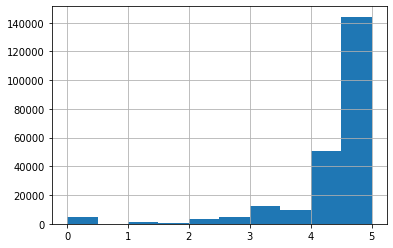

In [155]:
df_recipes2.rating.hist()

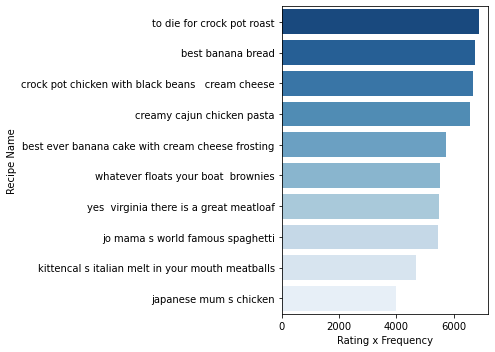

In [161]:
# add weights to rating
# df['weighted_rating'] =
tmp = df_recipes2.copy()
tmp['weighted_rating'] = tmp.rating * tmp.review_freq
tmp = tmp.sort_values('weighted_rating', ascending=False)

plt.figure(figsize=(7,5))
sns.barplot(x="weighted_rating", y="name", data=tmp.head(10), palette="Blues_r")
plt.xlabel('Rating x Frequency')
plt.ylabel('Recipe Name')
# plt.xticks(range(0,6))
plt.tight_layout()

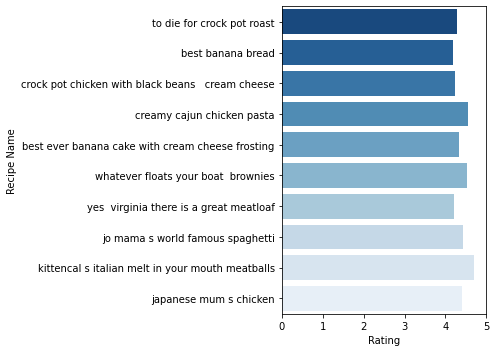

In [163]:
plt.figure(figsize=(7,5))
sns.barplot(x="rating", y="name", data=tmp.head(10), palette="Blues_r")
plt.xlabel('Rating')
plt.ylabel('Recipe Name')
plt.xticks(range(0,6))
plt.tight_layout()

In [165]:
df_recipes2.sort_values('review_freq', ascending=False)

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients,review_freq,rating
22168,best banana bread,2886,65,1762,1999-09-26,"['time-to-make', 'course', 'main-ingredient', ...","[272.8, 16.0, 97.0, 14.0, 7.0, 31.0, 14.0]",13,"['remove odd pots and pans from oven', 'prehea...",you'll never need another banana bread recipe ...,"['butter', 'granulated sugar', 'eggs', 'banana...",8,1613,4.185989
213826,to die for crock pot roast,27208,545,28201,2002-05-03,"['weeknight', 'time-to-make', 'course', 'main-...","[295.2, 14.0, 0.0, 15.0, 99.0, 19.0, 0.0]",7,"['place beef roast in crock pot', 'mix the dri...","amazing flavor, and so simple! no salt needed ...","['beef roast', 'brown gravy mix', 'dried itali...",5,1601,4.288570
66687,crock pot chicken with black beans cream cheese,89204,243,137839,2004-04-16,"['time-to-make', 'course', 'main-ingredient', ...","[679.2, 53.0, 39.0, 38.0, 91.0, 75.0, 16.0]",5,"['take 4-5 frozen , yes , frozen , boneless ch...",i love this crock-pot chicken recipe for two r...,"['boneless chicken breasts', 'black beans', 'c...",5,1579,4.220393
62431,creamy cajun chicken pasta,39087,25,30534,2002-09-02,"['30-minutes-or-less', 'time-to-make', 'course...","[719.1, 63.0, 12.0, 34.0, 78.0, 120.0, 15.0]",4,['place chicken and cajun seasoning in a bowl ...,n'awlin's style of chicken with an updated alf...,"['boneless skinless chicken breast halves', 'l...",12,1448,4.541436
22388,best ever banana cake with cream cheese frosting,67256,75,82367,2003-07-24,"['weeknight', 'time-to-make', 'course', 'main-...","[503.5, 31.0, 222.0, 15.0, 11.0, 61.0, 25.0]",18,"['preheat oven to 275f', 'grease and flour a 9...",this is one of (if not) the best banana cake i...,"['bananas', 'lemon juice', 'flour', 'baking so...",13,1322,4.329047
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145148,norwegian christmas cabbage,235316,60,122878,2007-06-17,"['bacon', '60-minutes-or-less', 'time-to-make'...","[266.1, 21.0, 88.0, 11.0, 12.0, 22.0, 10.0]",17,['lay two slices of bacon across the bottom of...,a favorite i'm posting from allrecipes.com. i...,"['bacon', 'cabbage', 'all-purpose flour', 'car...",7,1,3.000000
145147,norwegian chicken gjetost sauce,292999,55,372895,2008-03-20,"['60-minutes-or-less', 'time-to-make', 'main-i...","[539.0, 30.0, 5.0, 16.0, 109.0, 56.0, 1.0]",10,"['cut chicken into serving-sized pieces', 'rub...","gjetost is a rich, carmelized norwegian goat c...","['boneless skinless chicken breasts', 'cooking...",10,1,3.000000
49578,chocolate candy cane cake,243042,165,4291,2007-07-29,"['time-to-make', 'course', 'preparation', 'occ...","[644.6, 37.0, 320.0, 14.0, 12.0, 59.0, 34.0]",24,['grease and flour two 9 x 1 1 / 2 inch round ...,"a christmas classic (yes, i know it's july whe...","['cake flour', 'cocoa powder', 'salt', 'shorte...",15,1,5.000000
145144,norwegian cake doughnuts hjortebakkels,423275,50,560491,2010-05-05,"['weeknight', '60-minutes-or-less', 'time-to-m...","[466.7, 19.0, 108.0, 7.0, 20.0, 33.0, 25.0]",9,"['beat eggs until lemon colored', 'add sugar ,...",hjortebakkels are smaller and richer than amer...,"['eggs', 'sugar', 'flour', 'butter', 'whipping...",11,1,5.000000
